In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def tinferior(A, b):
    n = A.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(A[i,:i], x[:i])) / A[i,i]
    return x

def tsuperior(A, b):
    n = A.shape[0]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i,i+1:], x[i+1:])) / A[i,i]
    return x

def DLU(A):
    D = np.diag(np.diag(A))
    L = (np.tril(A) - D)*(-1)
    U = (np.triu(A) - D)*(-1)
    return D,L,U






def LU(A, b):
    n = A.shape[0]
    L = np.identity(n)
    U = np.array(A, dtype=np.float64)

    for k in range(n):
        for j in range(k+1, n):
            L[j,k] = U[j,k] / U[k,k]
            U[j,k:] -= L[j,k] * U[k,k:]

    z = tinferior(L, b)
    x = tsuperior(U, z)

    return x



def Jacobi(A,b):
    n=A.shape[0]
    D,L,U=DLU(A)
    M = D
    Mi=np.linalg.inv(M)
    N=L+U

    J=np.dot(Mi,N)

    x=np.zeros(n)
    d=True

    while d is True:
      xk=np.dot(J,x)+np.dot(Mi,b)
      if np.linalg.norm(x-xk)<10**(-6):
        d=False
      x=xk

    return x



def GS(A,b):
    
    n=A.shape[0]
    D,L,U=DLU(A)
    M=D-L
    Mi=np.linalg.inv(M)
    N=U
    
    J=np.dot(Mi,N)
    
    x=np.zeros(n)
    d=True
  
    while d is True:
      xk=np.dot(J,x)+np.dot(Mi,b)
      if np.linalg.norm(x-xk)<10**(-6):
        d=False
      x=xk
  
    return x



def SOR(A,b,w):
  n=A.shape[0]
  D,L,U=DLU(A)

  M=(1/w)*(D-w*L)
  Mi=np.linalg.inv(M)
  N=(1/w)*((1-w)*D+w*U)

  J=np.dot(Mi,N)

  x=np.zeros(n)
  d=True

  while d is True:
    xk=np.dot(J,x)+np.dot(Mi,b)
    if np.linalg.norm(x-xk)<10**(-6):
      d=False
    x=xk

  return x





def generar(n):
  A=np.random.uniform(low=-1,high=1,size=(n,n))
  for i in range(0,n):
    suma=0.2
    for j in range(0,n):
      if j!=i:
        suma+=abs(A[i][j])
        A[i][i]=suma

  b=[1 for i in range(0,n)]

  return A,b


In [ ]:
tamanos=[2**k for k in range(2,15)]
tiempos_LU = []
tiempos_Jacobi = []
tiempos_Gauss_Seidel = []
tiempos_SOR25= []
tiempos_SOR50=[]
tiempos_SOR75=[]


for n in tamanos:
    A,b=generar(n)

    # Resolver usando el método LU
    inicio = time.time()
    x_LU = LU(A,b)
    tiempos_LU.append(time.time() - inicio)

    # Resolver usando el método de Jacobi
    inicio = time.time()
    x_Jacobi = Jacobi(A,b)
    tiempos_Jacobi.append(time.time() - inicio)

    # Resolver usando el método de Gauss-Seidel
    inicio = time.time()
    x_Gauss_Seidel = GS(A,b)
    tiempos_Gauss_Seidel.append(time.time() - inicio)

    # Resolver usando el método SOR
    inicio = time.time()
    x_SOR25 = SOR(A,b,0.25)
    tiempos_SOR25.append(time.time() - inicio)
    
    inicio = time.time()
    x_SOR50 = SOR(A,b,0.50)
    tiempos_SOR50.append(time.time() - inicio)
    
    inicio = time.time()
    x_SOR75 = SOR(A,b,0.75)
    tiempos_SOR75.append(time.time() - inicio)

In [8]:
tamanos

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [10]:
len(tiempos_SOR75)

12

In [12]:
tiempos_Jacobi

[0.00598454475402832,
 0.0,
 0.000997781753540039,
 0.008973360061645508,
 0.023935556411743164,
 0.007909297943115234,
 0.03723955154418945,
 0.05921816825866699,
 0.45079469680786133,
 0.7086753845214844,
 5.763044595718384,
 32.718461990356445]

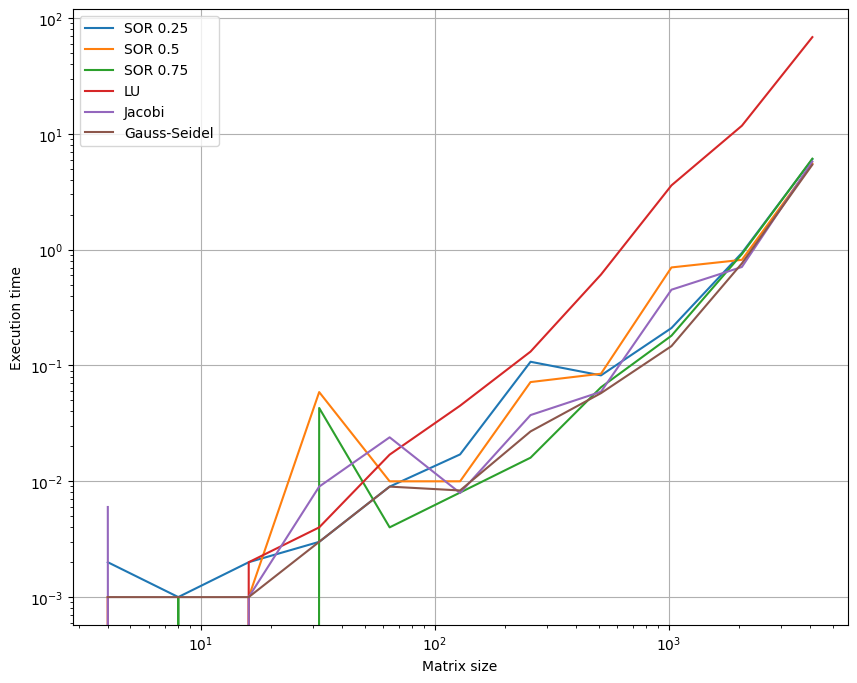

In [11]:
n = 11
plt.figure(figsize=(10, 8))
plt.loglog(tamanos[:n], tiempos_SOR25[:n], label='SOR 0.25')
plt.loglog(tamanos[:n], tiempos_SOR50[:n], label='SOR 0.5')
plt.loglog(tamanos[:n], tiempos_SOR75[:n], label='SOR 0.75')
plt.loglog(tamanos[:n], tiempos_LU[:n], label='LU')
plt.loglog(tamanos[:n], tiempos_Jacobi[:n], label='Jacobi')
plt.loglog(tamanos[:n], tiempos_Gauss_Seidel[:n], label='Gauss-Seidel')
plt.xlabel('Matrix size')
plt.ylabel('Execution time')
plt.legend()
plt.grid(True)
plt.show()
